In [1]:
%matplotlib inline

In [2]:
import dill
import numpy as np
import matplotlib.pyplot as plt

data = dill.load(open('ws', 'rb'))

5825.09


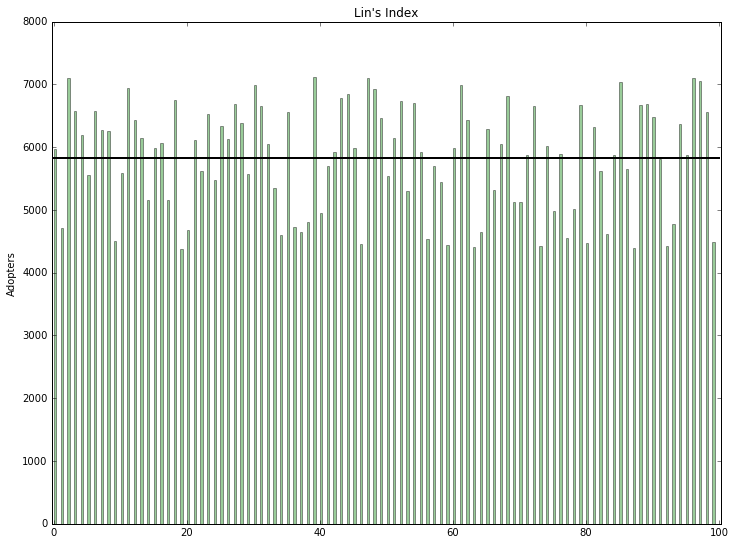

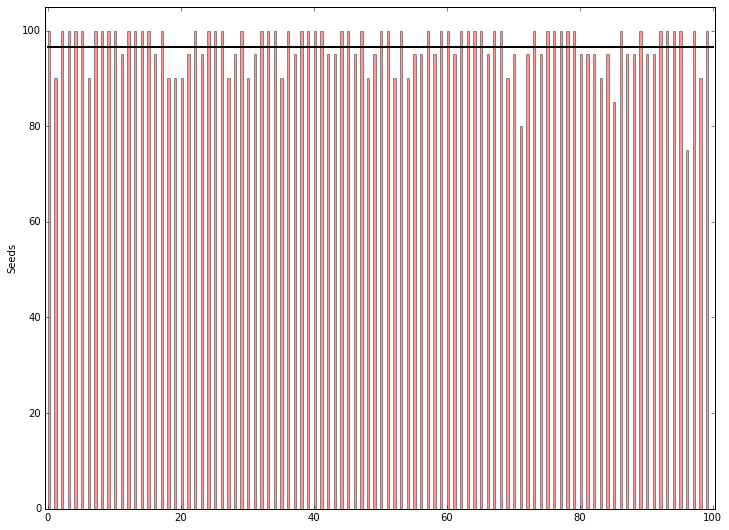

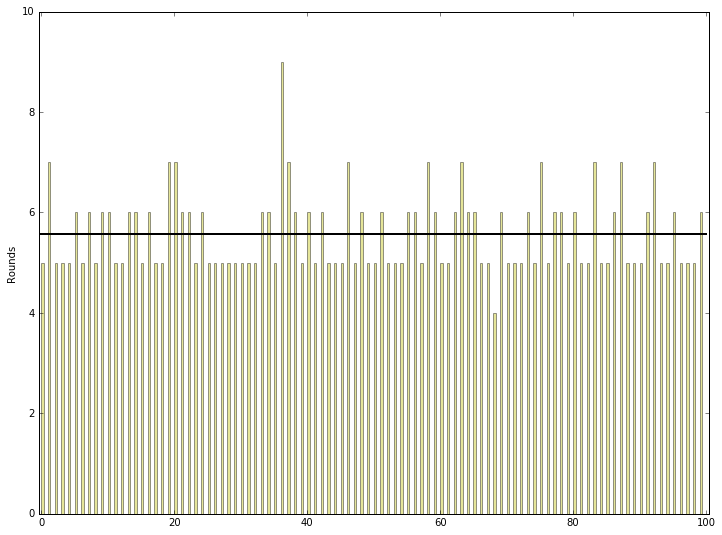

In [3]:
ind = np.arange(len(data))

lin = list(map(lambda o: o[0], data))
lin_adopters = np.asarray(list(map(lambda o: o[0], lin)))
lin_seeds = np.asarray(list(map(lambda o: o[1], lin)))
lin_rounds = np.asarray(list(map(lambda o: o[2], lin)))

lin_adopters_mean = np.mean(lin_adopters)
lin_seeds_mean = np.mean(lin_seeds)
lin_rounds_mean = np.mean(lin_rounds)

print(lin_adopters_mean)

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.bar(ind, lin_adopters, width, color='g', alpha=0.4)
ax1.plot([0, 100], [lin_adopters_mean, lin_adopters_mean], 'k-', lw=2)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,8000)
ax1.set_ylabel('Adopters')
ax1.set_title("Lin's Index")

plt.show()

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.bar(ind, lin_seeds, width, color='r', alpha=0.4)
ax1.plot([0, 100], [lin_seeds_mean, lin_seeds_mean], 'k-', lw=2)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,105)
ax1.set_ylabel('Seeds')

plt.show()

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.plot([0, 100], [lin_rounds_mean, lin_rounds_mean], 'k-', lw=2)
ax1.bar(ind, lin_rounds, width, color='y', alpha=0.4)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,10)
ax1.set_ylabel('Rounds')

plt.show()

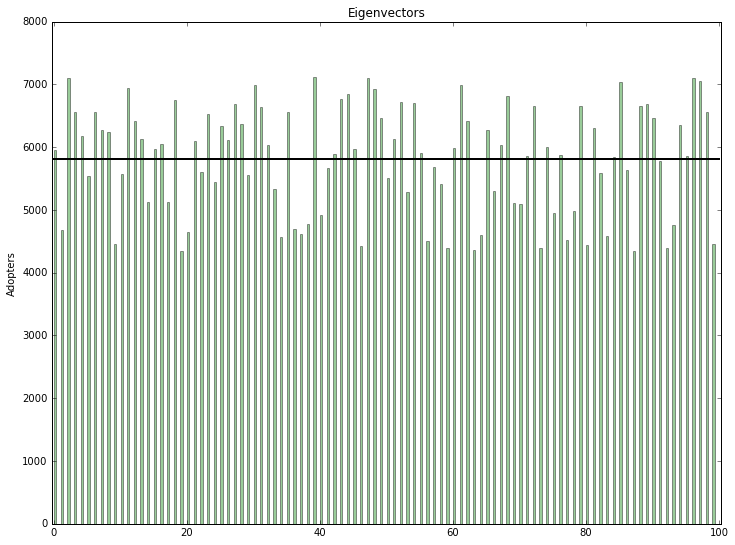

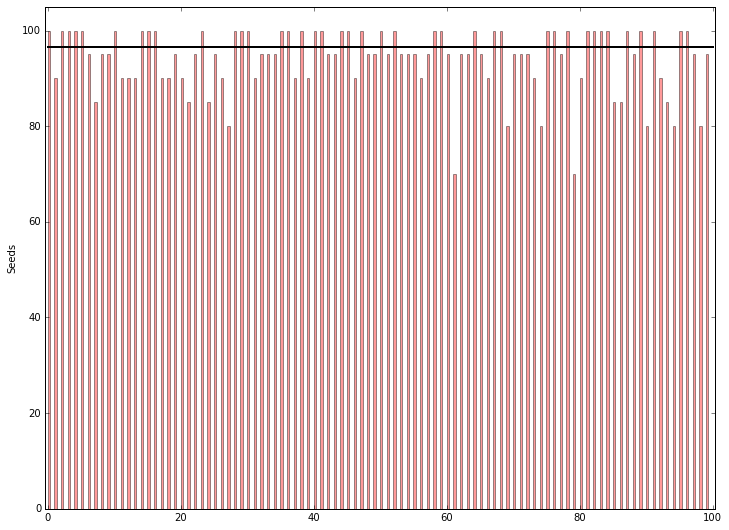

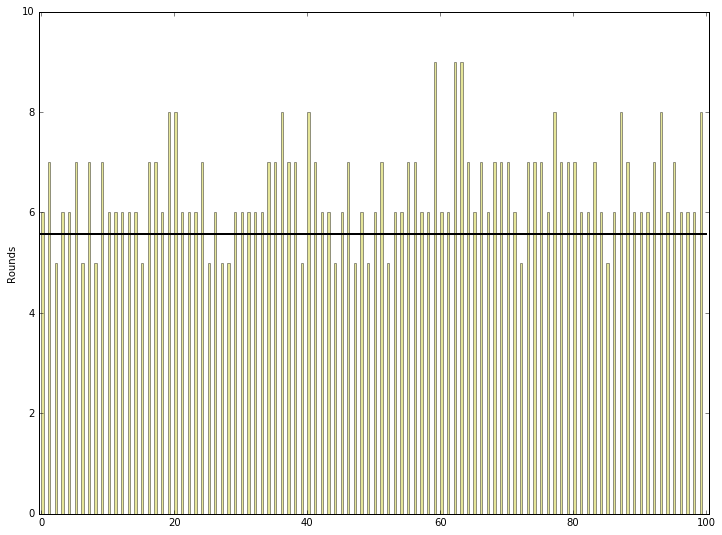

In [4]:
eigen = list(map(lambda o: o[1], data))
eigen_adopters = np.asarray(list(map(lambda o: o[0], eigen)))
eigen_seeds = np.asarray(list(map(lambda o: o[1], eigen)))
eigen_rounds = np.asarray(list(map(lambda o: o[2], eigen)))

eigen_adopters_mean = np.mean(eigen_adopters)
eigen_seeds_mean = np.mean(lin_seeds)
eigen_rounds_mean = np.mean(lin_rounds)

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.bar(ind, eigen_adopters, width, color='g', alpha=0.4)
ax1.plot([0, 100], [eigen_adopters_mean, eigen_adopters_mean], 'k-', lw=2)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,8000)
ax1.set_ylabel('Adopters')
ax1.set_title("Eigenvectors")

plt.show()

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.plot([0, 100], [eigen_seeds_mean, eigen_seeds_mean], 'k-', lw=2)
ax1.bar(ind, eigen_seeds, width, color='r', alpha=0.4)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,105)
ax1.set_ylabel('Seeds')

plt.show()

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.plot([0, 100], [eigen_rounds_mean, eigen_rounds_mean], 'k-', lw=2)
ax1.bar(ind, eigen_rounds, width, color='y', alpha=0.4)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,10)
ax1.set_ylabel('Rounds')

plt.show()

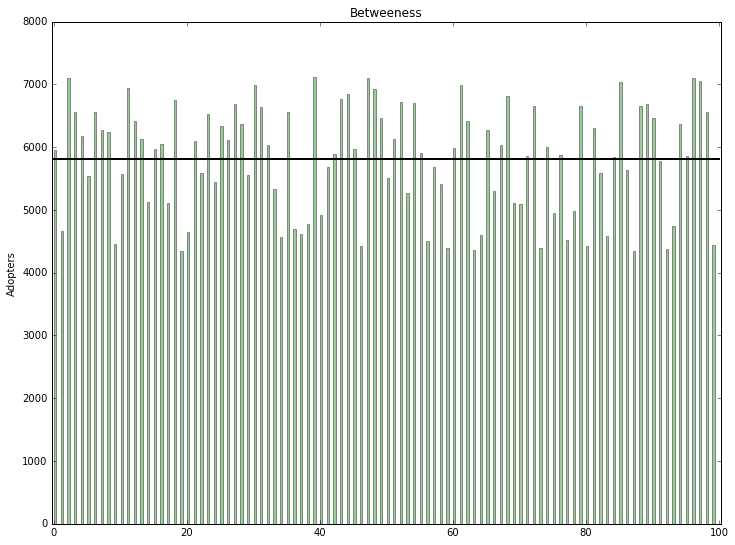

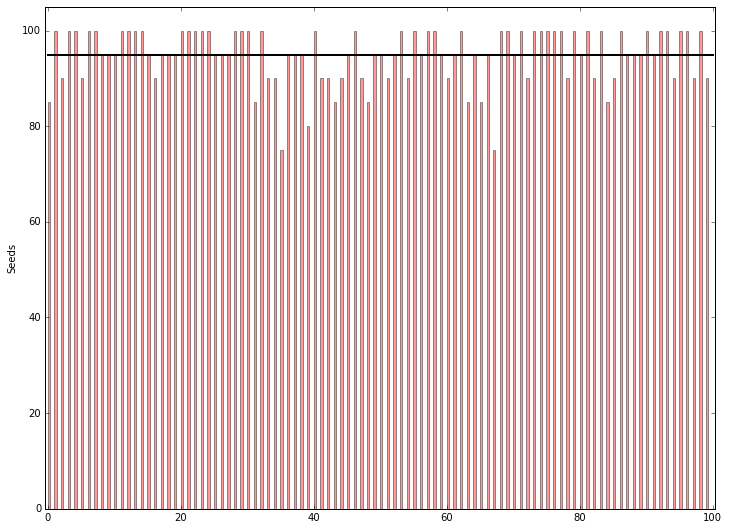

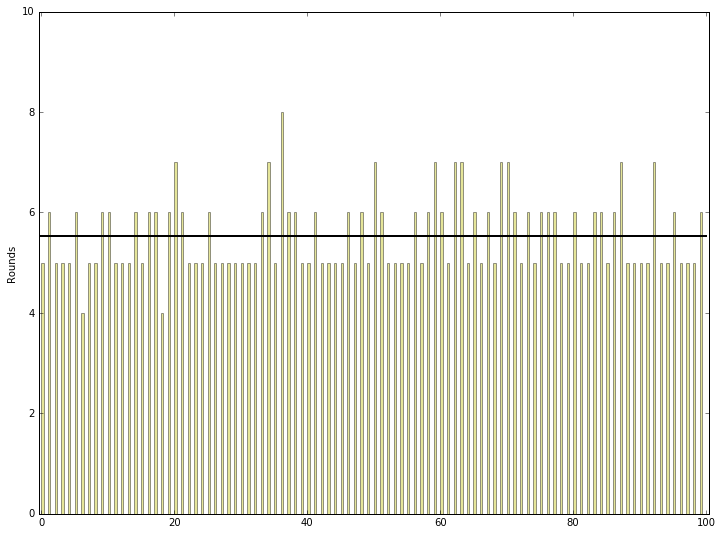

In [5]:
betweeness = list(map(lambda o: o[2], data))
betweeness_adopters = np.asarray(list(map(lambda o: o[0], betweeness)))
betweeness_seeds = np.asarray(list(map(lambda o: o[1], betweeness)))
betweeness_rounds = np.asarray(list(map(lambda o: o[2], betweeness)))

betweeness_adopters_mean = np.mean(betweeness_adopters)
betweeness_seeds_mean = np.mean(betweeness_seeds)
betweeness_rounds_mean = np.mean(betweeness_rounds)

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.plot([0, 100], [betweeness_adopters_mean, betweeness_adopters_mean], 'k-', lw=2)
ax1.bar(ind, betweeness_adopters, width, color='g', alpha=0.4)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,8000)
ax1.set_ylabel('Adopters')
ax1.set_title("Betweeness")

plt.show()

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.plot([0, 100], [betweeness_seeds_mean, betweeness_seeds_mean], 'k-', lw=2)
ax1.bar(ind, betweeness_seeds, width, color='r', alpha=0.4)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,105)
ax1.set_ylabel('Seeds')

plt.show()

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.plot([0, 100], [betweeness_rounds_mean, betweeness_rounds_mean], 'k-', lw=2)
ax1.bar(ind, betweeness_rounds, width, color='y', alpha=0.4)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,10)
ax1.set_ylabel('Rounds')

plt.show()

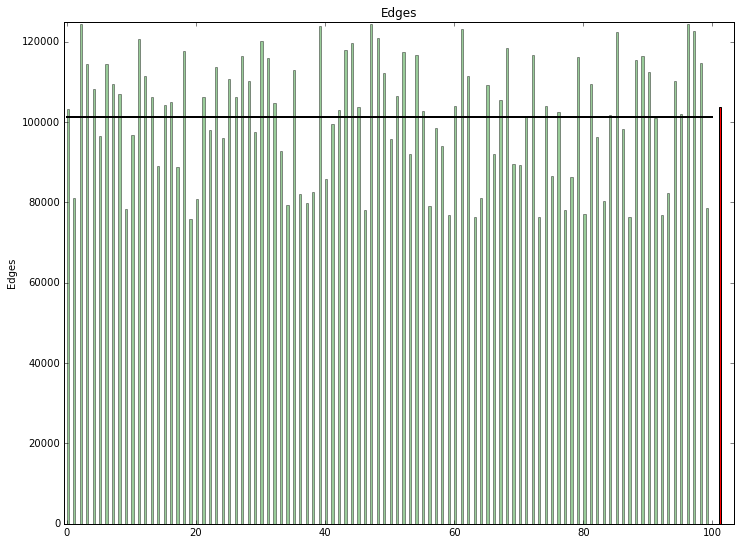

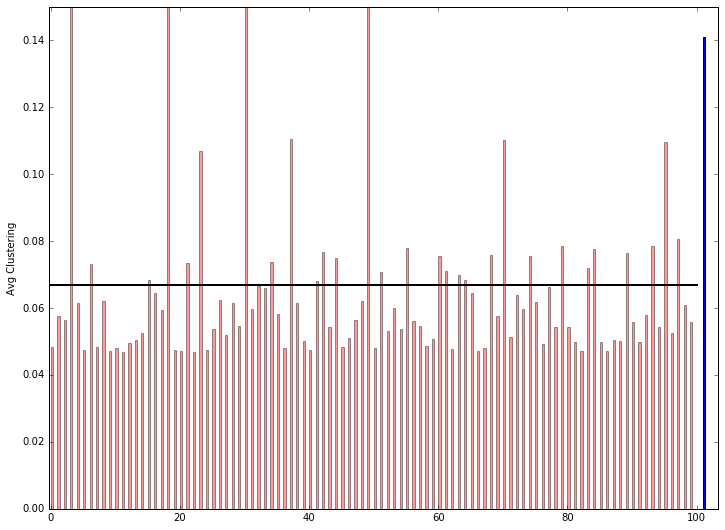

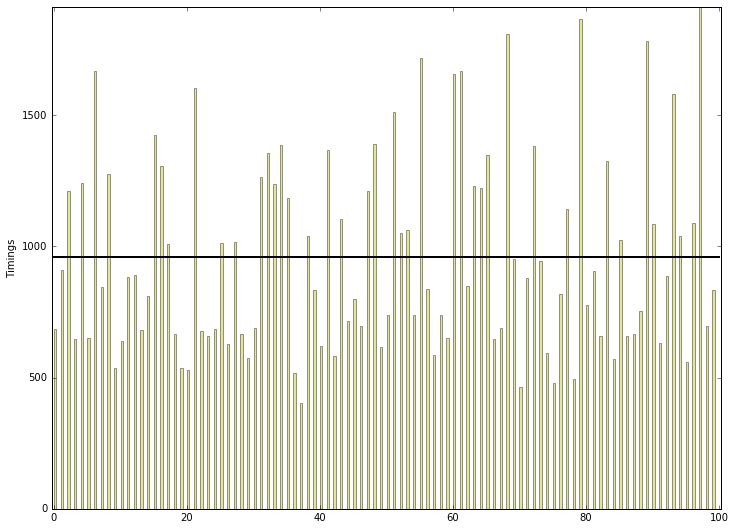

In [6]:
info = list(map(lambda o: o[3], data))
edges = list(map(lambda o: o[0], info))
edges_mean = np.mean(edges)
average_clustering = list(map(lambda o: o[1], info))
average_clustering_mean = np.mean(average_clustering)
timings = list(map(lambda o: o[2], info))
timings_mean = np.mean(timings)

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.plot([0, 100], [edges_mean, edges_mean], 'k-', lw=2)
ax1.bar(ind, edges, width, color='g', alpha=0.4)
ax1.bar(101, 103689, width, color='r')
# axes and labels
ax1.set_xlim(-width,len(ind)+width + 3)
ax1.set_ylim(0,125000)
ax1.set_ylabel('Edges')
ax1.set_title("Edges")

plt.show()

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.plot([0, 100], [average_clustering_mean, average_clustering_mean], 'k-', lw=2)
ax1.bar(ind, average_clustering, width, color='r', alpha=0.4)
ax1.bar(101, 0.140898, width, color='b')
# axes and labels
ax1.set_xlim(-width,len(ind)+width+3)
ax1.set_ylim(0,0.15)
ax1.set_ylabel('Avg Clustering')

plt.show()

fig = plt.figure(figsize = (12,9))
ax1 = fig.add_subplot(111)
width = 0.35
ax1.plot([0, 100], [timings_mean, timings_mean], 'k-', lw=2)
ax1.bar(ind, timings, width, color='y', alpha=0.4)
# axes and labels
ax1.set_xlim(-width,len(ind)+width)
ax1.set_ylim(0,max(timings))
ax1.set_ylabel('Timings')

plt.show()

In [7]:
wv_lin = (5841,100,4)
wv_eigen = (5875,90,4)
wv_bet = (5783,100,4)

wv_data = dill.load(open('ww', 'rb'))

wv_lin = list(map(lambda o: o[0], wv_data))
wv_lin_adopters = np.asarray(list(map(lambda o: o[0], wv_lin)))
wv_lin_seeds = np.asarray(list(map(lambda o: o[1], wv_lin)))
wv_lin_rounds = np.asarray(list(map(lambda o: o[2], wv_lin)))

wv_lin_adopters_mean = np.mean(wv_lin_adopters)
wv_lin_seeds_mean = np.mean(wv_lin_seeds)
wv_lin_rounds_mean = np.mean(wv_lin_rounds)
wv_lin_adopters_std = np.std(wv_lin_adopters)
wv_lin_seeds_std = np.std(wv_lin_seeds)
wv_lin_rounds_std = np.std(wv_lin_rounds)

wv_eigen = list(map(lambda o: o[1], wv_data))
wv_eigen_adopters = np.asarray(list(map(lambda o: o[0], wv_eigen)))
wv_eigen_seeds = np.asarray(list(map(lambda o: o[1], wv_eigen)))
wv_eigen_rounds = np.asarray(list(map(lambda o: o[2], wv_eigen)))

wv_eigen_adopters_mean = np.mean(wv_eigen_adopters)
wv_eigen_seeds_mean = np.mean(wv_eigen_seeds)
wv_eigen_rounds_mean = np.mean(wv_eigen_rounds)
wv_eigen_adopters_std = np.std(wv_eigen_adopters)
wv_eigen_seeds_std = np.std(wv_eigen_seeds)
wv_eigen_rounds_std = np.std(wv_eigen_rounds)

wv_bet = list(map(lambda o: o[2], wv_data))
wv_bet_adopters = np.asarray(list(map(lambda o: o[0], wv_bet)))
wv_bet_seeds = np.asarray(list(map(lambda o: o[1], wv_bet)))
wv_bet_rounds = np.asarray(list(map(lambda o: o[2], wv_bet)))

wv_bet_adopters_mean = np.mean(wv_bet_adopters)
wv_bet_seeds_mean = np.mean(wv_bet_seeds)
wv_bet_rounds_mean = np.mean(wv_bet_rounds)
wv_bet_adopters_std = np.std(wv_bet_adopters)
wv_bet_seeds_std = np.std(wv_bet_seeds)
wv_bet_rounds_std = np.std(wv_bet_rounds)


lin_adopters_std = np.std(lin_adopters)
lin_seeds_std = np.std(lin_seeds)
lin_rounds_std = np.std(lin_rounds)

betweeness_adopters_std = np.std(betweeness_adopters)
betweeness_seeds_std = np.std(betweeness_seeds)
betweeness_rounds_std = np.std(betweeness_rounds)

eigen_adopters_std = np.std(eigen_adopters)
eigen_seeds_std = np.std(eigen_seeds)
eigen_rounds_std = np.std(eigen_rounds)

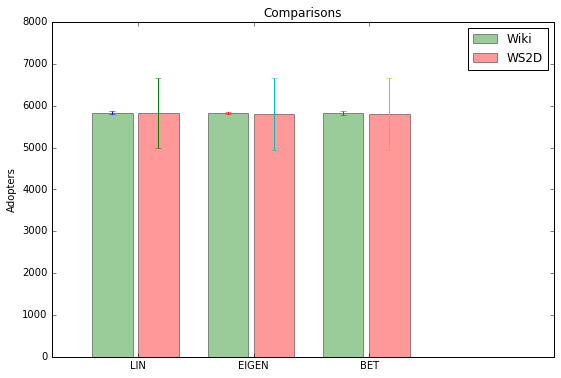

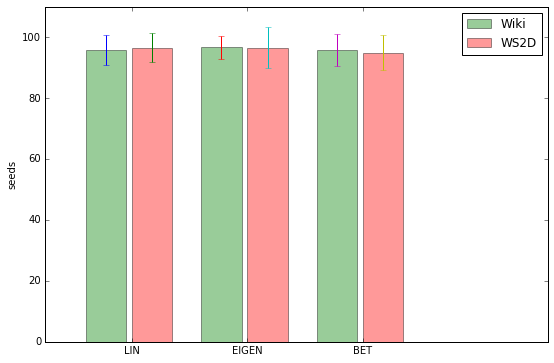

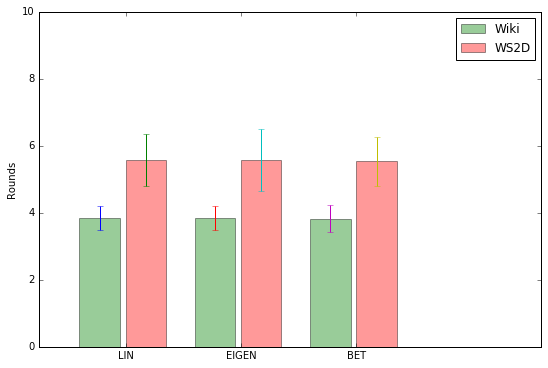

In [8]:
fig = plt.figure(figsize = (9,6))
ax1 = fig.add_subplot(111)
width = 0.35 
r1=ax1.bar(0, wv_lin_adopters_mean, width, color='g', alpha=0.4, yerr=wv_lin_adopters_std)
r2=ax1.bar(0.40, lin_adopters_mean, width, color='r', alpha=0.4, yerr=lin_adopters_std)

ax1.bar(1, wv_eigen_adopters_mean, width, color='g', alpha=0.4, yerr=wv_eigen_adopters_std)
ax1.bar(1.40, eigen_adopters_mean, width, color='r', alpha=0.4, yerr=eigen_adopters_std)

ax1.bar(2, wv_bet_adopters_mean, width, color='g', alpha=0.4, yerr=wv_bet_adopters_std)
ax1.bar(2.40, betweeness_adopters_mean, width, color='r', alpha=0.4, yerr=betweeness_adopters_std)
# axes and labels
ax1.set_xlim(-width,4)
ax1.set_ylim(0,8000)
ax1.set_xticklabels(('LIN', 'EIGEN', 'BET'))
ax1.set_ylabel('Adopters')
ax1.set_title("Comparisons")
ax1.set_xticks((0.4,1.4,2.4))
ax1.legend((r1[0], r2[0]), ('Wiki', 'WS2D'))


plt.show()


fig = plt.figure(figsize = (9,6))
ax1 = fig.add_subplot(111)
width = 0.35 
r1=ax1.bar(0, wv_lin_seeds_mean, width, color='g', alpha=0.4, yerr=wv_lin_seeds_std)
r2=ax1.bar(0.40, lin_seeds_mean, width, color='r', alpha=0.4, yerr=lin_seeds_std)

ax1.bar(1, wv_eigen_seeds_mean, width, color='g', alpha=0.4, yerr=wv_eigen_seeds_std)
ax1.bar(1.40, eigen_seeds_mean, width, color='r', alpha=0.4, yerr=eigen_seeds_std)

ax1.bar(2, wv_bet_seeds_mean, width, color='g', alpha=0.4, yerr=wv_bet_seeds_std)
ax1.bar(2.40, betweeness_seeds_mean, width, color='r', alpha=0.4, yerr=betweeness_seeds_std)
# axes and labels
ax1.set_xlim(-width,4)
ax1.set_ylim(0,110)
ax1.set_xticklabels(('LIN', 'EIGEN', 'BET'))
ax1.set_ylabel('seeds')
ax1.set_xticks((0.4,1.4,2.4))
ax1.legend((r1[0], r2[0]), ('Wiki', 'WS2D'))


plt.show()


fig = plt.figure(figsize = (9,6))
ax1 = fig.add_subplot(111)
width = 0.35 
r1=ax1.bar(0, wv_lin_rounds_mean, width, color='g', alpha=0.4, yerr=wv_lin_rounds_std)
r2=ax1.bar(0.40, lin_rounds_mean, width, color='r', alpha=0.4, yerr=lin_rounds_std)

ax1.bar(1, wv_eigen_rounds_mean, width, color='g', alpha=0.4, yerr=wv_eigen_rounds_std)
ax1.bar(1.40, eigen_rounds_mean, width, color='r', alpha=0.4, yerr=eigen_rounds_std)

ax1.bar(2, wv_bet_rounds_mean, width, color='g', alpha=0.4, yerr=wv_bet_rounds_std)
ax1.bar(2.40, betweeness_rounds_mean, width, color='r', alpha=0.4, yerr=betweeness_rounds_std)
# axes and labels
ax1.set_xlim(-width,4)
ax1.set_ylim(0,10)
ax1.set_xticklabels(('LIN', 'EIGEN', 'BET'))
ax1.set_ylabel('Rounds')
ax1.set_xticks((0.4,1.4,2.4))
ax1.legend((r1[0], r2[0]), ('Wiki', 'WS2D'))


plt.show()